In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Làm sạch dữ liệu

In [2]:
dic = {
    'name' : pd.Series(['nam','an','binh', 'hoa', 'lan'], index=['a','b','c', 'd', 'e']),
    'age':pd.Series([19,20,19], index=['a','b','d']),
    'class':pd.Series(['DS1','DS2','DS3'], index=['a','b','e'])
}

df = pd.DataFrame(dic)
df

,name,age,class
a,nam,19.0,DS1
b,an,20.0,DS2
c,binh,NaN,NaN
d,hoa,19.0,NaN
e,lan,NaN,DS3


In [3]:
df.replace(19, 21)

,name,age,class
a,nam,21.0,DS1
b,an,20.0,DS2
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [4]:
df.replace({19:21,'DS2':'DS4'},inplace=True)

In [5]:
df

,name,age,class
a,nam,21.0,DS1
b,an,20.0,DS4
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [6]:
df['class'].replace('DS1','DS5', inplace = True)
df

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   class   3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 160.0+ bytes


In [8]:
df.isnull()

,name,age,class
a,False,False,False
b,False,False,False
c,False,True,True
d,False,False,True
e,False,True,False


In [9]:
df.isnull().any()

name     False
age       True
class     True
dtype: bool

In [10]:
df.isnull().sum()

name     0
age      2
class    2
dtype: int64

In [11]:
df.isnull().any(axis=1)

a    False
b    False
c     True
d     True
e     True
dtype: bool

In [12]:
df[df.isnull().any(axis=1)]

,name,age,class
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [13]:
df

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [ ]:
df.fillna(method='ffill')

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,20.0,DS4
d,hoa,21.0,DS4
e,lan,21.0,DS3


In [ ]:
df.fillna(method='backfill')

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,21.0,DS3
d,hoa,21.0,DS3
e,lan,NaN,DS3


In [ ]:
df

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [ ]:
df['age'].fillna(df.age.mean())

a    21.000000
b    20.000000
c    20.666667
d    21.000000
e    20.666667
Name: age, dtype: float64

In [ ]:
df.age.mode()

0    21.0
dtype: float64

In [ ]:
df['age'].fillna(df.age.mode()[0])

a    21.0
b    20.0
c    21.0
d    21.0
e    21.0
Name: age, dtype: float64

In [14]:
df['class'].mode()

0    DS3
1    DS4
2    DS5
dtype: object

In [15]:
df.fillna(value={'age':df.age.mode()[0],'class': df['class'].mode()[0]})

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,21.0,DS3
d,hoa,21.0,DS3
e,lan,21.0,DS3


In [16]:
df

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,NaN,NaN
d,hoa,21.0,NaN
e,lan,NaN,DS3


In [ ]:
df.dropna(axis=0) # xóa nan theo dòng

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4


In [ ]:
df.dropna(axis=1)

,name
a,nam
b,an
c,binh
d,hoa
e,lan


In [ ]:
df.dropna(subset=['class'])

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
e,lan,NaN,DS3


In [ ]:
df.interpolate()

,name,age,class
a,nam,21.0,DS5
b,an,20.0,DS4
c,binh,20.5,NaN
d,hoa,21.0,NaN
e,lan,21.0,DS3


## Trực quan hóa dữ liệu

### Bar plot

In [17]:
# ve bar plot
# du lieu la dan so cua cac thanh pho
# ve bar plot: moi bar la mot thanh pho (truc x, nhom)
# gia tri cua bar la so dan (truc y, gia tri)

In [18]:
df = pd.DataFrame({'thanhpho':['Sai gon', 'Hue', 'Ha noi'], 'danso':[200,100,350]})

In [19]:
df

,thanhpho,danso
0,Sai gon,200
1,Hue,100
2,Ha noi,350


<AxesSubplot:title={'center':'Dân số Sài Gòn, Huế, Hà Nội'}, xlabel='thanhpho'>

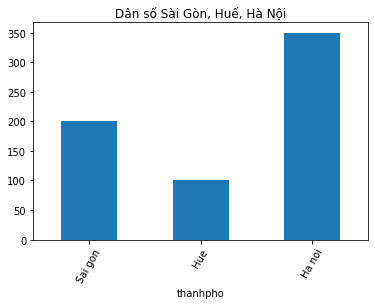

In [23]:
df.plot.bar(x='thanhpho', rot = 60, title = 'Dân số Sài Gòn, Huế, Hà Nội', legend = False)

In [ ]:
df = pd.DataFrame({'thanhpho':['Sai gon', 'Hue', 'Ha noi'], 'dansonam':[150,60,200], 'dansonu':[50,40,150]})

In [ ]:
df

,thanhpho,dansonam,dansonu
0,Sai gon,150,50
1,Hue,60,40
2,Ha noi,200,150


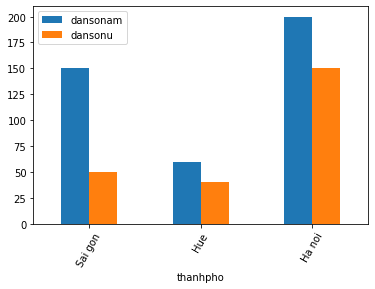

In [ ]:
df.plot.bar(x='thanhpho', rot = 60);

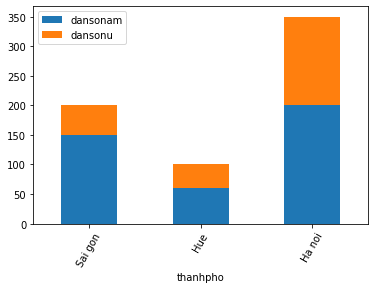

In [ ]:
df.plot.bar(x='thanhpho', stacked=True, rot=60);

In [ ]:
# ve bar plot cac phong voi tong luong moi phong
df = pd.read_excel('employees.xls')

In [ ]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17 00:00:00,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21 00:00:00,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13 00:00:00,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03 00:00:00,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21 00:00:00,IT_PROG,6000,NaN,103.0,60.0


In [ ]:
df_ = df.groupby('DEPARTMENT_ID')['SALARY'].sum().to_frame()

In [ ]:
df_

,SALARY
DEPARTMENT_ID,
10.0,4400
20.0,19000
30.0,24900
40.0,6500
50.0,156400
60.0,28800
70.0,10000
80.0,304500
90.0,58000


<AxesSubplot:xlabel='DEPARTMENT_ID'>

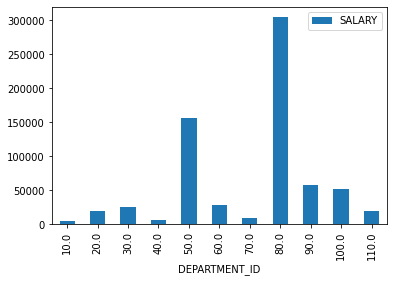

In [ ]:
df_.plot.bar()

In [ ]:
df = pd.read_csv('museum_visitors.csv', parse_dates=True)

In [ ]:
df.shape

(59, 5)

In [ ]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [ ]:
df.tail()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
54,2018-07-01,23136,4191,2620,4718
55,2018-08-01,20815,4866,2409,3891
56,2018-09-01,21020,4956,2146,3180
57,2018-10-01,19280,4622,2364,3775
58,2018-11-01,17163,4082,2385,4562


In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,year
0,2014-01-01,24778,4486,1581,6602,2014
1,2014-02-01,18976,4172,1785,5029,2014
2,2014-03-01,25231,7082,3229,8129,2014
3,2014-04-01,26989,6756,2129,2824,2014
4,2014-05-01,36883,10858,3676,10694,2014


In [ ]:
df_ = df.groupby('year').sum()
df_

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
year,,,,
2014,333315,129338,25304,96917
2015,317517,75367,29359,108548
2016,280784,64633,37284,86422
2017,270314,60218,36739,75880
2018,217708,52341,31868,51547


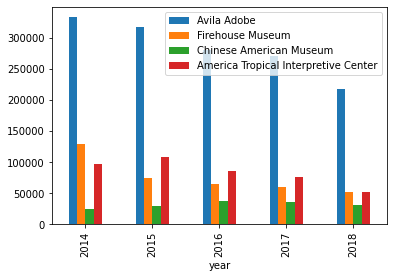

In [ ]:
df_.plot.bar();

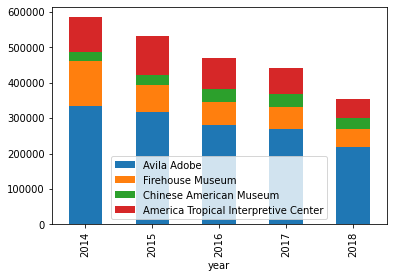

In [ ]:
df_.plot.bar(stacked = True);

### Box plot

In [24]:
lst = [74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 73, 75, 78, 79, 76, 74, 76, 72, 71, 75, 77, 74, 73, 74, 78, 73, 75, 73, 75, 75, 74, 69, 71, 74, 73, 73, 76, 74, 74, 70, 72, 77, 74, 70, 73, 75, 76, 76, 78, 74, 74, 76, 77, 81, 78, 75, 77, 75, 76, 74, 72, 72, 75, 73,  73, 73, 70, 70, 70, 76, 68, 71, 72, 75, 75, 75, 75, 68, 74, 78, 71, 73, 76, 74, 74, 79, 75, 73, 76, 74, 74, 73, 72, 74, 73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72, 72, 76, 74, 72, 77, 74, 77, 75, 76, 80, 74, 74, 75, 78, 73, 73, 74, 75, 76, 71, 73, 74, 76, 76, 74, 73, 74, 70, 72,  73, 73, 73, 73, 71, 74, 74, 72, 74, 71, 74, 73, 75, 75, 79, 73, 75, 76, 74, 76, 78, 74, 76, 72, 74, 76, 74, 75, 78, 75, 72, 74, 72, 74, 70, 71, 70, 75, 71, 71, 73, 72, 71, 73, 72, 75, 74, 74, 75, 73, 77, 73, 76, 75, 74, 76, 75, 73, 71, 76, 75, 72, 71, 77, 73, 74, 71, 72, 74, 75,    73, 72, 75, 75, 74, 72, 74, 71, 70, 74, 77, 77, 75, 75, 78, 75, 76, 73, 75, 75, 79, 77, 76, 71, 75, 74, 69, 71, 76, 72, 72, 70, 72, 73, 71, 72, 71, 73, 72, 73, 74, 74, 72, 75, 74, 74, 77, 75, 73, 72, 71, 74, 77, 75, 75, 75, 78, 78, 74, 76, 78, 76, 70, 72, 80, 74, 74, 71, 70, 72,    71, 74, 71, 72, 71, 74, 69, 76, 75, 75, 76, 73, 76, 73, 77, 73, 72, 72, 77, 77, 71, 74, 74, 73, 78, 75, 73, 70, 74, 72, 73, 73, 75, 75, 74, 76, 73, 74, 75, 75, 72, 73, 73, 72, 74, 78, 76, 73, 74, 75, 70, 75, 71, 72, 78, 75, 73, 73, 71, 75, 77, 72, 69, 73, 74, 72, 70, 75, 70, 72,    72, 74, 73, 74, 76, 75, 80, 72, 75, 73, 74, 74, 73, 75, 75, 71, 73, 75, 74, 74, 72, 74, 74, 74, 73, 76, 75, 72, 73, 73, 73, 72, 72, 72, 72, 71, 75, 75, 74, 73, 75, 79, 74, 76, 73, 74, 74, 72, 74, 74, 75, 78, 74, 74, 74, 77, 70, 73, 74, 73, 71, 75, 71, 72, 77, 74, 70, 77, 73, 72, 76, 71, 76, 78, 75, 73, 78, 74, 79, 75, 76, 72, 75, 75, 70, 72, 70, 74, 71, 76, 73, 76, 71, 69, 72, 72, 69, 73, 69, 73, 74, 74, 72, 71, 72, 72, 76, 76, 76, 74, 76, 75, 71, 72, 71, 73, 75, 76, 75, 71, 75, 74, 72, 73, 73, 73, 73, 76, 72, 76, 73, 73, 73, 75, 75, 77, 73, 72, 75, 70, 74, 72, 80, 71, 71, 74, 74, 73, 75, 76, 73, 77, 72, 73, 77, 76, 71, 75, 73, 74, 77, 71, 72, 73, 69, 73, 70, 74, 76, 73, 73, 75, 73, 79, 74, 73, 74, 77, 75, 74, 73, 77, 73, 77, 74, 74, 73, 77, 74, 77, 75, 77, 75, 71, 74, 70, 79, 72, 72, 70, 74, 74, 72, 73, 72, 74, 74, 76, 82, 74, 74, 70, 73, 73, 74, 77, 72, 76, 73, 73, 72, 74, 74, 71, 72, 75, 74, 74, 77, 70, 71, 73, 76, 71, 75, 74, 72, 76, 79, 76, 73, 76, 78, 75, 76, 72, 72, 73, 73, 75, 71, 76, 70, 75, 74, 75, 73, 71, 71, 72, 73, 73, 72, 69, 73, 78, 71, 73, 75, 76, 70, 74, 77, 75, 79, 72, 77, 73, 75, 75, 75, 73, 73, 76, 77, 75, 70, 71, 71, 75, 74, 69, 70, 75, 72, 75, 73, 72, 72, 72, 76, 75, 74, 69, 73, 72, 72, 75, 77, 76, 80, 77, 76, 79, 71, 75, 73, 76, 77, 73, 76, 70, 75, 73, 75, 70, 69, 71, 72, 72, 73, 70, 70, 73, 76, 75, 72, 73, 79, 71, 72, 74, 74, 74, 72, 76, 76, 72, 72, 71, 72, 72, 70, 77, 74, 72, 76, 71, 76, 71, 73, 70, 73, 73, 72, 71, 71, 71, 72, 72, 74, 74, 74, 71, 72, 75, 72, 71, 72, 72, 72, 72, 74, 74, 77, 75, 73, 75, 73, 76, 72, 77, 75, 72, 71, 71, 75, 72, 73, 73, 71, 70, 75, 71, 76, 73, 68, 71, 72, 74, 77, 72, 76, 78, 81, 72, 73, 76, 72, 72, 74, 76, 73, 76, 75, 70, 71, 74, 72, 73, 76, 76, 73, 71, 68, 71, 71, 74, 77, 69, 72, 76, 75, 76, 75, 76, 72, 74, 76, 74, 72, 75, 78, 77, 70, 72, 79, 74, 71, 68, 77, 75, 71, 72, 70, 72, 72, 73, 72, 74, 72, 72, 75, 72, 73, 74, 72, 78, 75, 72, 74, 75, 75, 76, 74, 74, 73, 74, 71, 74, 75, 76, 74, 76, 76, 73, 75, 75, 74, 68, 72, 75, 71, 70, 72, 73, 72, 75, 74, 70, 76, 71, 82, 72, 73, 74, 71, 75, 77, 72, 74, 72, 73, 78, 77, 73, 73, 73, 73, 73, 76, 75, 70, 73, 72, 73, 75, 74, 73, 73, 76, 73, 75, 70, 77, 72, 77, 74, 75, 75, 75, 75, 72, 74, 71, 76, 71, 75, 76, 83, 75, 74, 76, 72, 72, 75, 75, 72, 77, 73, 72, 70, 74, 72, 74, 72, 71, 70, 71, 76, 74, 76, 74, 74, 74, 75, 75, 71, 71, 74, 77, 71, 74, 75, 77, 76, 74, 76, 72, 71, 72, 75, 73, 68, 72, 69, 73, 73, 75, 70, 70, 74, 75, 74, 74, 73, 74, 75, 77, 73, 74, 76, 74, 75, 73, 76, 78, 75, 73, 77, 74, 72, 74, 72, 71, 73, 75, 73, 67, 67, 76, 74, 73, 70, 75, 70, 72, 77, 79, 78, 74, 75, 75, 78, 76, 75, 69, 75, 72, 75, 73, 74, 75, 75, 73]

In [25]:
# vẽ boxplot cho chiều cao các vận động viên
ser = pd.Series(lst)

<AxesSubplot:>

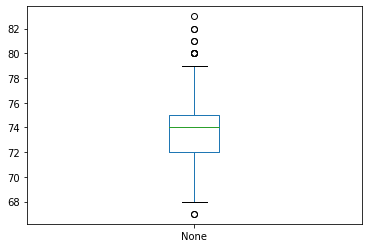

In [26]:
ser.plot.box()

In [27]:
ser.describe()

count    1015.000000
mean       73.689655
std         2.313932
min        67.000000
25%        72.000000
50%        74.000000
75%        75.000000
max        83.000000
dtype: float64

có ít nhất 75% vận động viên có chiều cao <=75 <br>
có ít nhất 25% vận động viên có chiều cao <= 72

In [28]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:title={'center':'age'}, xlabel='class'>

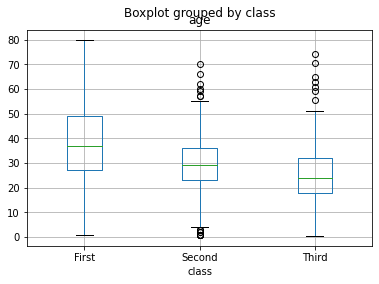

In [29]:
titanic.boxplot(by = 'class', column = ['age'] , grid = True)

### Histogram plot

In [ ]:
df = pd.DataFrame({'height': lst})

In [ ]:
df.head()

,height
0,74
1,74
2,72
3,72
4,73


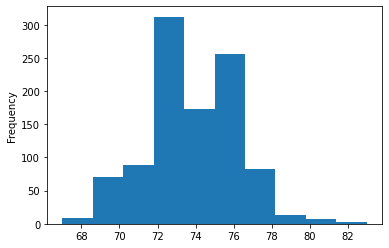

In [ ]:
df.plot.hist(legend = False);

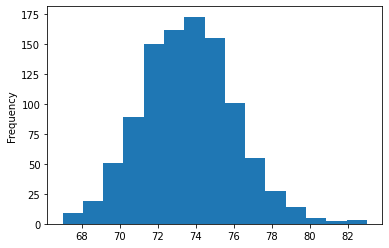

In [ ]:
df.plot.hist(legend = False, bins = 15);

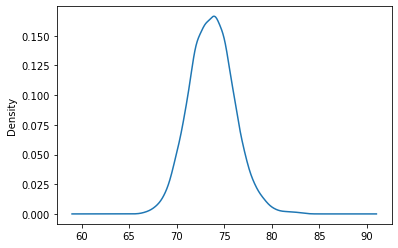

In [ ]:
df.plot.kde(legend = False);

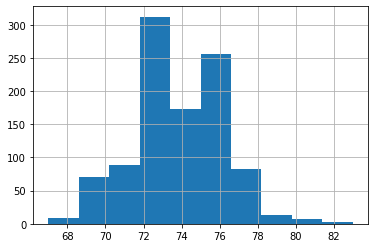

In [ ]:
df['height'].hist();

In [ ]:
data = np.histogram(df['height'], bins = 10)
data

(array([  9,  70,  89, 312, 173, 256,  82,  14,   7,   3], dtype=int32),
 array([67. , 68.6, 70.2, 71.8, 73.4, 75. , 76.6, 78.2, 79.8, 81.4, 83. ]))

In [ ]:
arr_1 = data[0]
arr_2 = data[1]
print('bin ranges:', arr_2)
print('values:', arr_1)

bin ranges: [67.  68.6 70.2 71.8 73.4 75.  76.6 78.2 79.8 81.4 83. ]
values: [  9  70  89 312 173 256  82  14   7   3]


In [ ]:
for i in range(1, len(arr_2)):
    i_ = i-1
    print(arr_2[i_], '-', arr_2[i], ':', arr_1[i_])

67.0 - 68.6 : 9
68.6 - 70.2 : 70
70.2 - 71.8 : 89
71.8 - 73.4 : 312
73.4 - 75.0 : 173
75.0 - 76.6 : 256
76.6 - 78.2 : 82
78.2 - 79.8 : 14
79.8 - 81.4 : 7
81.4 - 83.0 : 3


### Line plot

In [33]:
df = pd.read_csv('museum_visitors.csv', index_col='Date', parse_dates=True)

In [34]:
# bộ dữ liệu là số lượng du khách đến thăm 4 viện bảo tàng theo ngày
df.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


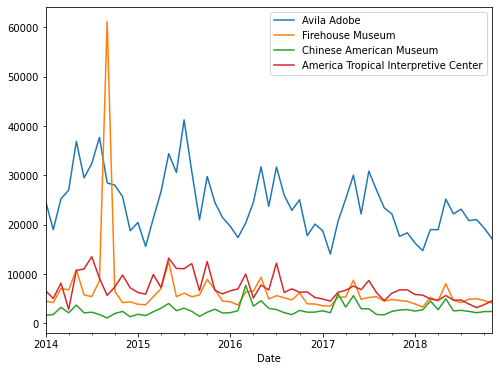

In [35]:
df.plot(figsize=(8,6));

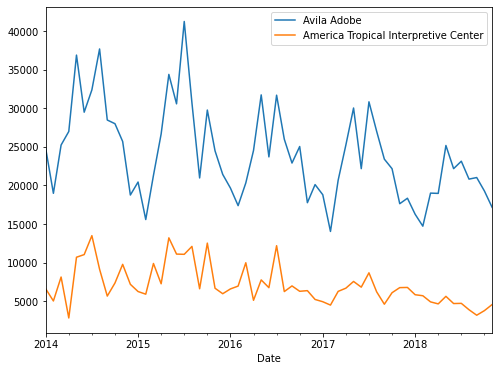

In [ ]:
df[['Avila Adobe','America Tropical Interpretive Center']].plot(figsize=(8,6));

### Pie plot

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97], 'radius': [2439.7, 6051.8, 6378.1]}, index=['Mercury', 'Venus', 'Earth'])
# sao thuy, sao kim, trai dat --> khoi luong, ban kinh

In [ ]:
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


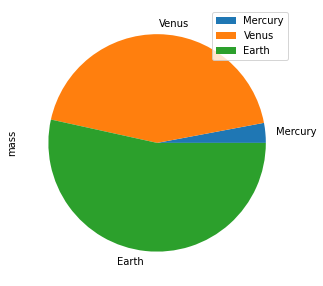

In [ ]:
df.plot.pie(y='mass', figsize=(5, 5));

In [ ]:
browsers = pd.Series(['Firefox', 'IE', 'Chrome', 'Safari', 'Opera', 'Others'])
percentages = pd.Series([45.0, 26.8, 12.8, 8.5, 6.2, 0.7])
df = pd.DataFrame({'browser':browsers, 'percentage':percentages})
df.set_index('browser', inplace=True)
df

,percentage
browser,
Firefox,45.0
IE,26.8
Chrome,12.8
Safari,8.5
Opera,6.2
Others,0.7


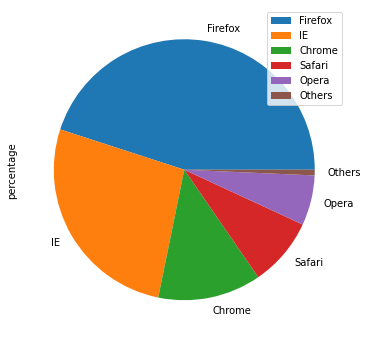

In [ ]:
df.plot.pie(y='percentage', figsize=(10,6));

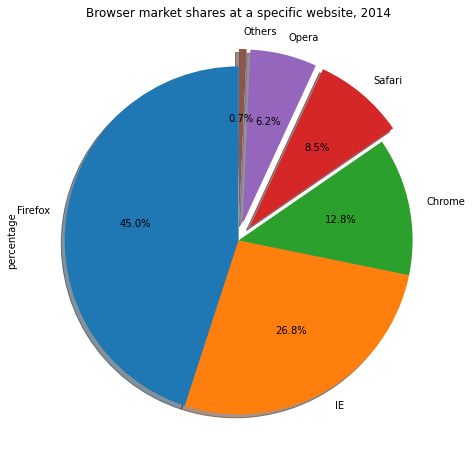

In [ ]:
df.plot.pie(y='percentage', figsize=(10,8), autopct='%.1f%%', legend=False, explode=(0, 0, 0, 0.1, 0.1, 0.1),
            shadow=True, startangle=90, title='Browser market shares at a specific website, 2014');

### Thống kê - Gom nhóm

In [ ]:
df = pd.read_csv('drinks.csv',index_col=0)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
gr = df.groupby('continent')
gr.groups

{'AF': [2, 4, 18, 22, 26, 27, 28, 29, 31, 33, 34, 38, 39, 47, 49, 53, 55, 56, 58, 62, 63, 66, 70, 71, 88, 95, 96, 97, 100, 101, 104, 107, 108, 114, 115, 117, 123, 124, 142, 148, 150, 152, 153, 158, 159, 162, 164, 172, 175, 179, 183, 191, 192], 'AS': [0, 12, 13, 19, 24, 30, 36, 46, 77, 78, 79, 80, 82, 85, 86, 87, 90, 91, 92, 94, 102, 103, 112, 116, 119, 127, 128, 134, 137, 138, 141, 149, 154, 161, 167, 168, 169, 171, 176, 177, 181, 186, 189, 190], 'EU': [1, 3, 7, 9, 10, 15, 16, 21, 25, 42, 44, 45, 48, 57, 60, 61, 64, 65, 67, 75, 76, 81, 83, 93, 98, 99, 105, 111, 113, 120, 126, 135, 136, 139, 140, 147, 151, 155, 156, 160, 165, 166, 170, 180, 182], 'OC': [8, 40, 59, 89, 106, 110, 118, 121, 125, 129, 131, 146, 157, 173, 178, 187], 'SA': [6, 20, 23, 35, 37, 52, 72, 132, 133, 163, 185, 188]}

In [ ]:
df.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [ ]:
df.groupby('continent')['beer_servings'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [ ]:
df.groupby('continent',as_index=False)[['beer_servings','spirit_servings']].mean()

,continent,beer_servings,spirit_servings
0,AF,61.471698,16.339623
1,AS,37.045455,60.840909
2,EU,193.777778,132.555556
3,OC,89.687500,58.437500
4,SA,175.083333,114.750000


In [ ]:
df.groupby('continent')['beer_servings'].min()

continent
AF     0
AS     0
EU     0
OC     0
SA    93
Name: beer_servings, dtype: int64

In [ ]:
df.groupby('continent').size()

continent
AF    53
AS    44
EU    45
OC    16
SA    12
dtype: int64

In [ ]:
df.groupby('continent').count()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
AF,53,53,53,53,53
AS,44,44,44,44,44
EU,45,45,45,45,45
OC,16,16,16,16,16
SA,12,12,12,12,12


In [ ]:
df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [ ]:
df.groupby('continent')['beer_servings'].agg(['min','max','mean']).reset_index()

,continent,min,max,mean
0,AF,0,376,61.471698
1,AS,0,247,37.045455
2,EU,0,361,193.777778
3,OC,0,306,89.687500
4,SA,93,333,175.083333


In [ ]:
dic = {
    'name' : ['nam','an','binh','trung'],
    'sex':['male','female','male','male'],
    'class':['DS1','DS2','DS1','DS3'], 
    'mark': [5,6,7,8]
}

df = pd.DataFrame(dic,index=['a','b','c','d'])
df

,name,sex,class,mark
a,nam,male,DS1,5
b,an,female,DS2,6
c,binh,male,DS1,7
d,trung,male,DS3,8


In [ ]:
df.groupby(['sex','class'])['mark'].mean()

sex     class
female  DS2      6
male    DS1      6
        DS3      8
Name: mark, dtype: int64

In [ ]:
pd.crosstab(index=df['sex'],columns=df['class'],values=df['mark'],aggfunc='mean')

class,DS1,DS2,DS3
sex,,,
female,NaN,6.0,NaN
male,6.0,NaN,8.0


In [ ]:
pd.pivot_table(data=df,index='sex',columns='class',values='mark',aggfunc='mean')

class,DS1,DS2,DS3
sex,,,
female,NaN,6.0,NaN
male,6.0,NaN,8.0


### Gộp dữ liệu

In [36]:
dic = {
    'name' : ['nam','an','binh'],
    'age':[19,20,21],
    'class':['DS1',np.nan,'DS3']
}

df1 = pd.DataFrame(dic)
df1

,name,age,class
0,nam,19,DS1
1,an,20,NaN
2,binh,21,DS3


In [37]:
dic = {
    'name' : ['nam','hoa'],
    'sex':['male','female']
}

df2 = pd.DataFrame(dic)
df2

,name,sex
0,nam,male
1,hoa,female


In [ ]:
df3 = pd.concat([df1,df2],ignore_index=True)
df3

,name,age,class,sex
0,nam,19.0,DS1,NaN
1,an,20.0,NaN,NaN
2,binh,21.0,DS3,NaN
3,nam,NaN,NaN,male
4,hoa,NaN,NaN,female


In [ ]:
df3 = pd.concat([df1,df2],axis=1,join='outer')
df3

,name,age,class,name,sex
0,nam,19,DS1,nam,male
1,an,20,NaN,hoa,female
2,binh,21,DS3,NaN,NaN


In [ ]:
df3 = pd.concat([df1,df2],axis=1,join='inner')
df3

,name,age,class,name,sex
0,nam,19,DS1,nam,male
1,an,20,NaN,hoa,female


In [ ]:
df3 = df1.append(df2,ignore_index=True)
df3

,name,age,class,sex
0,nam,19.0,DS1,NaN
1,an,20.0,NaN,NaN
2,binh,21.0,DS3,NaN
3,nam,NaN,NaN,male
4,hoa,NaN,NaN,female


In [38]:
df1

,name,age,class
0,nam,19,DS1
1,an,20,NaN
2,binh,21,DS3


In [39]:
df2

,name,sex
0,nam,male
1,hoa,female


In [ ]:
df3 = pd.merge(df1,df2,how='inner')
df3

,name,age,class,sex
0,nam,19,DS1,male


In [ ]:
df3 = pd.merge(df1,df2,how='outer')
df3

,name,age,class,sex
0,nam,19.0,DS1,male
1,an,20.0,NaN,NaN
2,binh,21.0,DS3,NaN
3,hoa,NaN,NaN,female


In [ ]:
df3 = pd.merge(df1,df2,how='left')
df3

,name,age,class,sex
0,nam,19,DS1,male
1,an,20,NaN,NaN
2,binh,21,DS3,NaN


In [ ]:
df3 = pd.merge(df1,df2,how='right')
df3

,name,age,class,sex
0,nam,19.0,DS1,male
1,hoa,NaN,NaN,female


In [41]:
df1

,name,age,class
0,nam,19,DS1
1,an,20,NaN
2,binh,21,DS3


In [40]:
dic = {
    'ten' : ['nam','hoa'],
    'sex':['male','female']
}

df2 = pd.DataFrame(dic)
df2

,ten,sex
0,nam,male
1,hoa,female


In [ ]:
df3 = pd.merge(df1,df2,left_on='name',right_on='ten',how='outer')
df3

,name,age,class,ten,sex
0,nam,19.0,DS1,nam,male
1,an,20.0,NaN,NaN,NaN
2,binh,21.0,DS3,NaN,NaN
3,NaN,NaN,NaN,hoa,female
